In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# ------------------ Helper Functions ------------------

def generate_row_combinations(row_clue, size):
    if row_clue == [0]:  # Special case: fully empty row
        return [['_'] * size]
    
    results = []
    total_blocks = sum(row_clue)
    num_gaps = len(row_clue) - 1
    total_empty = size - total_blocks - num_gaps

    def backtrack(idx, pos, row):
        if idx == len(row_clue):
            results.append(row[:])
            return

        block_size = row_clue[idx]
        for i in range(pos, size - block_size + 1):
            if any(cell == '#' for cell in row[i:i+block_size]):
                continue
            if idx > 0 and row[i - 1] != '_':
                continue
            new_row = row[:]
            new_row[i:i + block_size] = ['#'] * block_size
            if i + block_size < size:
                new_row[i + block_size] = '_'
            backtrack(idx + 1, i + block_size + 1, new_row)

    row = ['_'] * size
    backtrack(0, 0, row)
    return results

def generate_all_row_combinations(row_clues, size):
    return {i: generate_row_combinations(row_clue, size) for i, row_clue in enumerate(row_clues)}

def is_partial_grid_valid(grid, column_clues):
    num_cols = len(grid[0])

    for col_idx in range(num_cols):
        clue = column_clues[col_idx]
        col = [grid[row_idx][col_idx] for row_idx in range(len(grid))]

        clue_idx = 0  # Which clue block we're currently on
        count = 0
        in_block = False

        for cell in col:
            if cell == '#':
                count += 1
                in_block = True
                # Too many cells for current block
                if clue_idx >= len(clue) or count > clue[clue_idx]:
                    return False
            else:
                if in_block:
                    # Finished a block
                    if count != clue[clue_idx]:
                        return False
                    clue_idx += 1
                    count = 0
                    in_block = False

        # After partial column, we might still be in a block
        if in_block:
            if clue_idx >= len(clue):
                return False
            if count > clue[clue_idx]:
                return False

    return True

# ------------------ Graph Generation ------------------

def build_nonogram_branching_graph(row_clues, column_clues):
    size = len(column_clues)
    row_combinations = generate_all_row_combinations(row_clues, size)

    G = nx.DiGraph()
    state_id = 0
    level_states = {0: [([], "S0")]}  # start state
    G.add_node("S0", grid=[], label="")

    for level in range(len(row_clues)):
        level_states[level + 1] = []
        for prev_grid, prev_label in level_states[level]:
            for row in row_combinations[level]:
                new_grid = prev_grid + [row]
                if is_partial_grid_valid(new_grid, column_clues):
                    state_id += 1
                    label = f"S{state_id}"
                    G.add_node(label, grid=new_grid, label=label)
                    G.add_edge(prev_label, label)
                    level_states[level + 1].append((new_grid, label))
                    
    return G

# ------------------ Graph Visualization ------------------

def draw_branching_graph(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(14, 8))

    node_labels = {
        node: "\n".join("".join(row) for row in G.nodes[node]['grid']) if G.nodes[node].get('grid') else "Start"
        for node in G.nodes
    }

    nx.draw(G, pos, with_labels=False, arrows=True, node_color='lightblue', node_size=1600)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
    plt.title("Nonogram State Graph (Dynamic Branching)")
    plt.axis("off")
    plt.show()


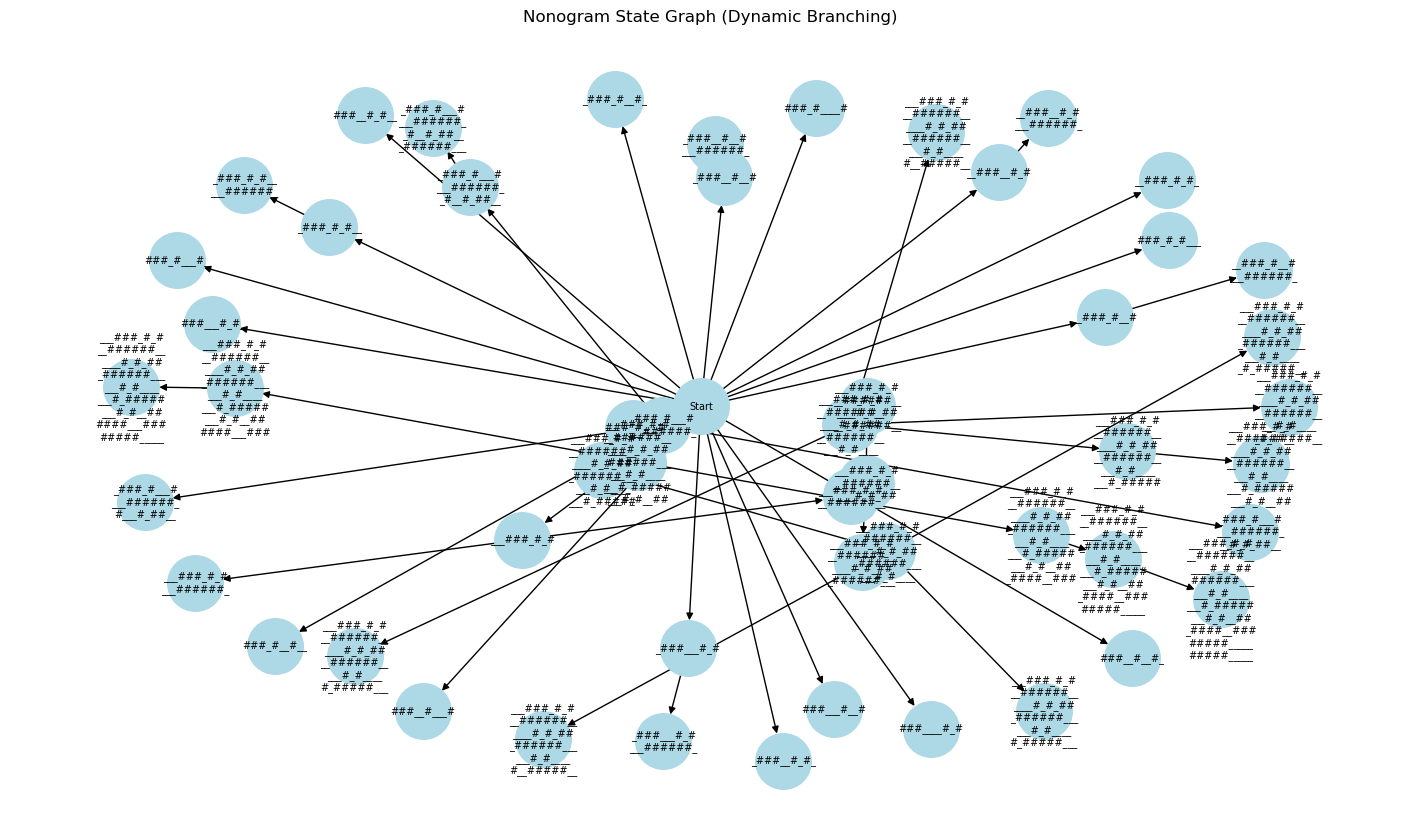

Total nodes in the graph: 53
Total edges in the graph: 52


In [43]:
# Input for your case
# column_clues = [[1], [2], [2], [2]]
# row_clues = [[1], [1,1], [2], [2]]
# column_clues = [[1],[2],[3],[1]]
# row_clues = [[1],[3],[1,1],[1]]
column_clues = [[2],[1,3],[1,1,3],[2,7],[4,3],[2,4],[3,1],[2,1,1],[1,3],[1,1,3]]
row_clues = [[3,1,1],[6],[1,1,2],[6],[1,1],[1,5],[1,1,2],[4,3],[5],[5]]
G = build_nonogram_branching_graph(row_clues, column_clues)
draw_branching_graph(G)

print(f"Total nodes in the graph: {len(G.nodes)}")
print(f"Total edges in the graph: {len(G.edges)}")


In [45]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# ------------------ Helper Functions ------------------

def generate_row_combinations(row_clue, size):
    if row_clue == [0]:  # Special case: fully empty row
        return [['_'] * size]
    
    results = []
    total_blocks = sum(row_clue)
    num_gaps = len(row_clue) - 1
    total_empty = size - total_blocks - num_gaps

    def backtrack(idx, pos, row):
        if idx == len(row_clue):
            results.append(row[:])
            return

        block_size = row_clue[idx]
        for i in range(pos, size - block_size + 1):
            if any(cell == '#' for cell in row[i:i+block_size]):
                continue
            if idx > 0 and row[i - 1] != '_':
                continue
            new_row = row[:]
            new_row[i:i + block_size] = ['#'] * block_size
            if i + block_size < size:
                new_row[i + block_size] = '_'
            backtrack(idx + 1, i + block_size + 1, new_row)

    row = ['_'] * size
    backtrack(0, 0, row)
    return results

def generate_all_row_combinations(row_clues, size):
    return {i: generate_row_combinations(row_clue, size) for i, row_clue in enumerate(row_clues)}

def is_partial_grid_valid(grid, column_clues):
    num_cols = len(grid[0])
    
    # Check if the grid is empty or invalid
    if not grid or not grid[0]:
        return False

    for col_idx in range(num_cols):
        clue = column_clues[col_idx]
        col = [grid[row_idx][col_idx] for row_idx in range(len(grid))]

        clue_idx = 0  # Which clue block we're currently on
        count = 0
        in_block = False

        for cell in col:
            if cell == '#':
                count += 1
                in_block = True
                # Too many cells for current block
                if clue_idx >= len(clue) or count > clue[clue_idx]:
                    return False
            else:
                if in_block:
                    # Finished a block
                    if count != clue[clue_idx]:
                        return False
                    clue_idx += 1
                    count = 0
                    in_block = False

        # After partial column, we might still be in a block
        if in_block:
            if clue_idx >= len(clue):
                return False
            if count > clue[clue_idx]:
                return False

    return True

def build_full_nonogram_tree(row_combinations):
    size = len(row_combinations[0])
    G = nx.DiGraph()
    state_id = 0
    level_states = {0: [([], "S0")]}  # start state
    G.add_node("S0", grid=[], label="")

    for level in range(len(row_combinations)):
        level_states[level + 1] = []
        for prev_grid, prev_label in level_states[level]:
            for row in row_combinations[level]:
                new_grid = prev_grid + [row]
                state_id += 1
                label = f"S{state_id}"
                G.add_node(label, grid=new_grid, label=label)
                G.add_edge(prev_label, label)
                level_states[level + 1].append((new_grid, label))
                    
    return G

def check_row_validity(grid, row_clues):
    for row_idx, row in enumerate(grid):
        row_blocks = [len(list(group)) for group in ''.join(row).split('_') if group]
        if row_blocks != row_clues[row_idx]:
            return False
    return True

# ------------------ Check and Print Valid Nodes ------------------

def check_and_print_valid_nodes(G, row_clues, column_clues):
    for node in G.nodes:
        grid = G.nodes[node]['grid']
        
        # Debugging the node grid structure
        print(f"Checking Node {node} with grid:")
        for row in grid:
            print("".join(row))
        
        # Check if both row and column clues are satisfied
        if check_row_validity(grid, row_clues) and is_partial_grid_valid(grid, column_clues):
            print(f"Valid Solution Node ({node}):")
            for row in grid:
                print("".join(row))
            print()

# ------------------ Graph Visualization ------------------

def draw_branching_graph(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(14, 8))

    node_labels = {
        node: "\n".join("".join(row) for row in G.nodes[node]['grid']) if G.nodes[node].get('grid') else "Start"
        for node in G.nodes
    }

    nx.draw(G, pos, with_labels=False, arrows=True, node_color='lightblue', node_size=1600)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
    plt.title("Nonogram State Graph (Dynamic Branching)")
    plt.axis("off")
    plt.show()

# ------------------ Input ------------------

row_clues = [[1], [1, 1], [2], [2]]
column_clues = [[1], [2], [2], [2]]
size = 4

# Generate row combinations and build the graph
row_combinations = generate_all_row_combinations(row_clues, size)
G = build_full_nonogram_tree(row_combinations)

# Check and print valid nodes
check_and_print_valid_nodes(G, row_clues, column_clues)

# Visualize the graph (optional)
draw_branching_graph(G)

# Count nodes and edges
print(f"Total nodes in the graph: {len(G.nodes)}")
print(f"Total edges in the graph: {len(G.edges)}")


Checking Node S0 with grid:


IndexError: list index out of range